TAKEN FROM 1
Ideas for implementing the experimental data analysis (EDA) part were taken from:
https://deepnote.com/app/code-along-tutorials/A-Beginners-Guide-to-Exploratory-Data-Analysis-with-Python-f536530d-7195-4f68-ab5b-5dca4a4c3579?utm_content=f536530d-7195-4f68-ab5b-5dca4a4c3579

TAKEN FROM 2
The code for preparing the training and test sets was taken from https://medium.com/@whyamit404/understanding-train-test-split-in-pandas-eb1116576c66

TAKEN FROM 3
Ideas for plots for the data understanding part were taken from the tutorial https://harvard-iacs.github.io/2019-CS109A/labs/lab-5/solutions/#inspire

TAKEN FROM 4
The code for using the logistic regression machine learning model was taken from https://www.digitalocean.com/community/tutorials/logistic-regression-with-scikit-learn

TAKEN FROM 5
The code for transforming non-numerical values from a pandas dataframe into numerical values using the LabelEncoder from scikit-learn was taken from https://stackoverflow.com/a/50259157

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns
import random

In [26]:
seed = 1
random.seed(seed)
test_size = 0.2
max_iter_lr = 1000

In [27]:
# TAKEN FROM START 1

# Data understanding and preparation

In [28]:
hotel_bookings_dataset = pd.read_csv('data/hotel_bookings.csv')
hotel_bookings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [29]:
# the easiest solution (at the moment) is to drop all the NULL values
hotel_bookings_dataset = hotel_bookings_dataset.dropna()

In [30]:
hotel_bookings_dataset.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [31]:
# Average Daily Rate values
hotel_bookings_dataset['adr'].describe()

count    217.000000
mean      63.793733
std       38.823568
min        0.000000
25%       40.000000
50%       48.000000
75%       85.000000
max      246.000000
Name: adr, dtype: float64

In [32]:
# TAKEN FROM START 3

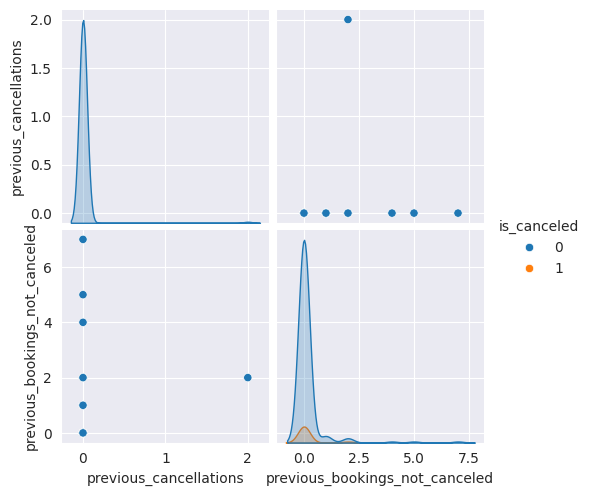

In [33]:
cancellations_features = ["previous_cancellations", "previous_bookings_not_canceled"]
sns.pairplot(data=hotel_bookings_dataset[cancellations_features + ["is_canceled"]], hue="is_canceled")


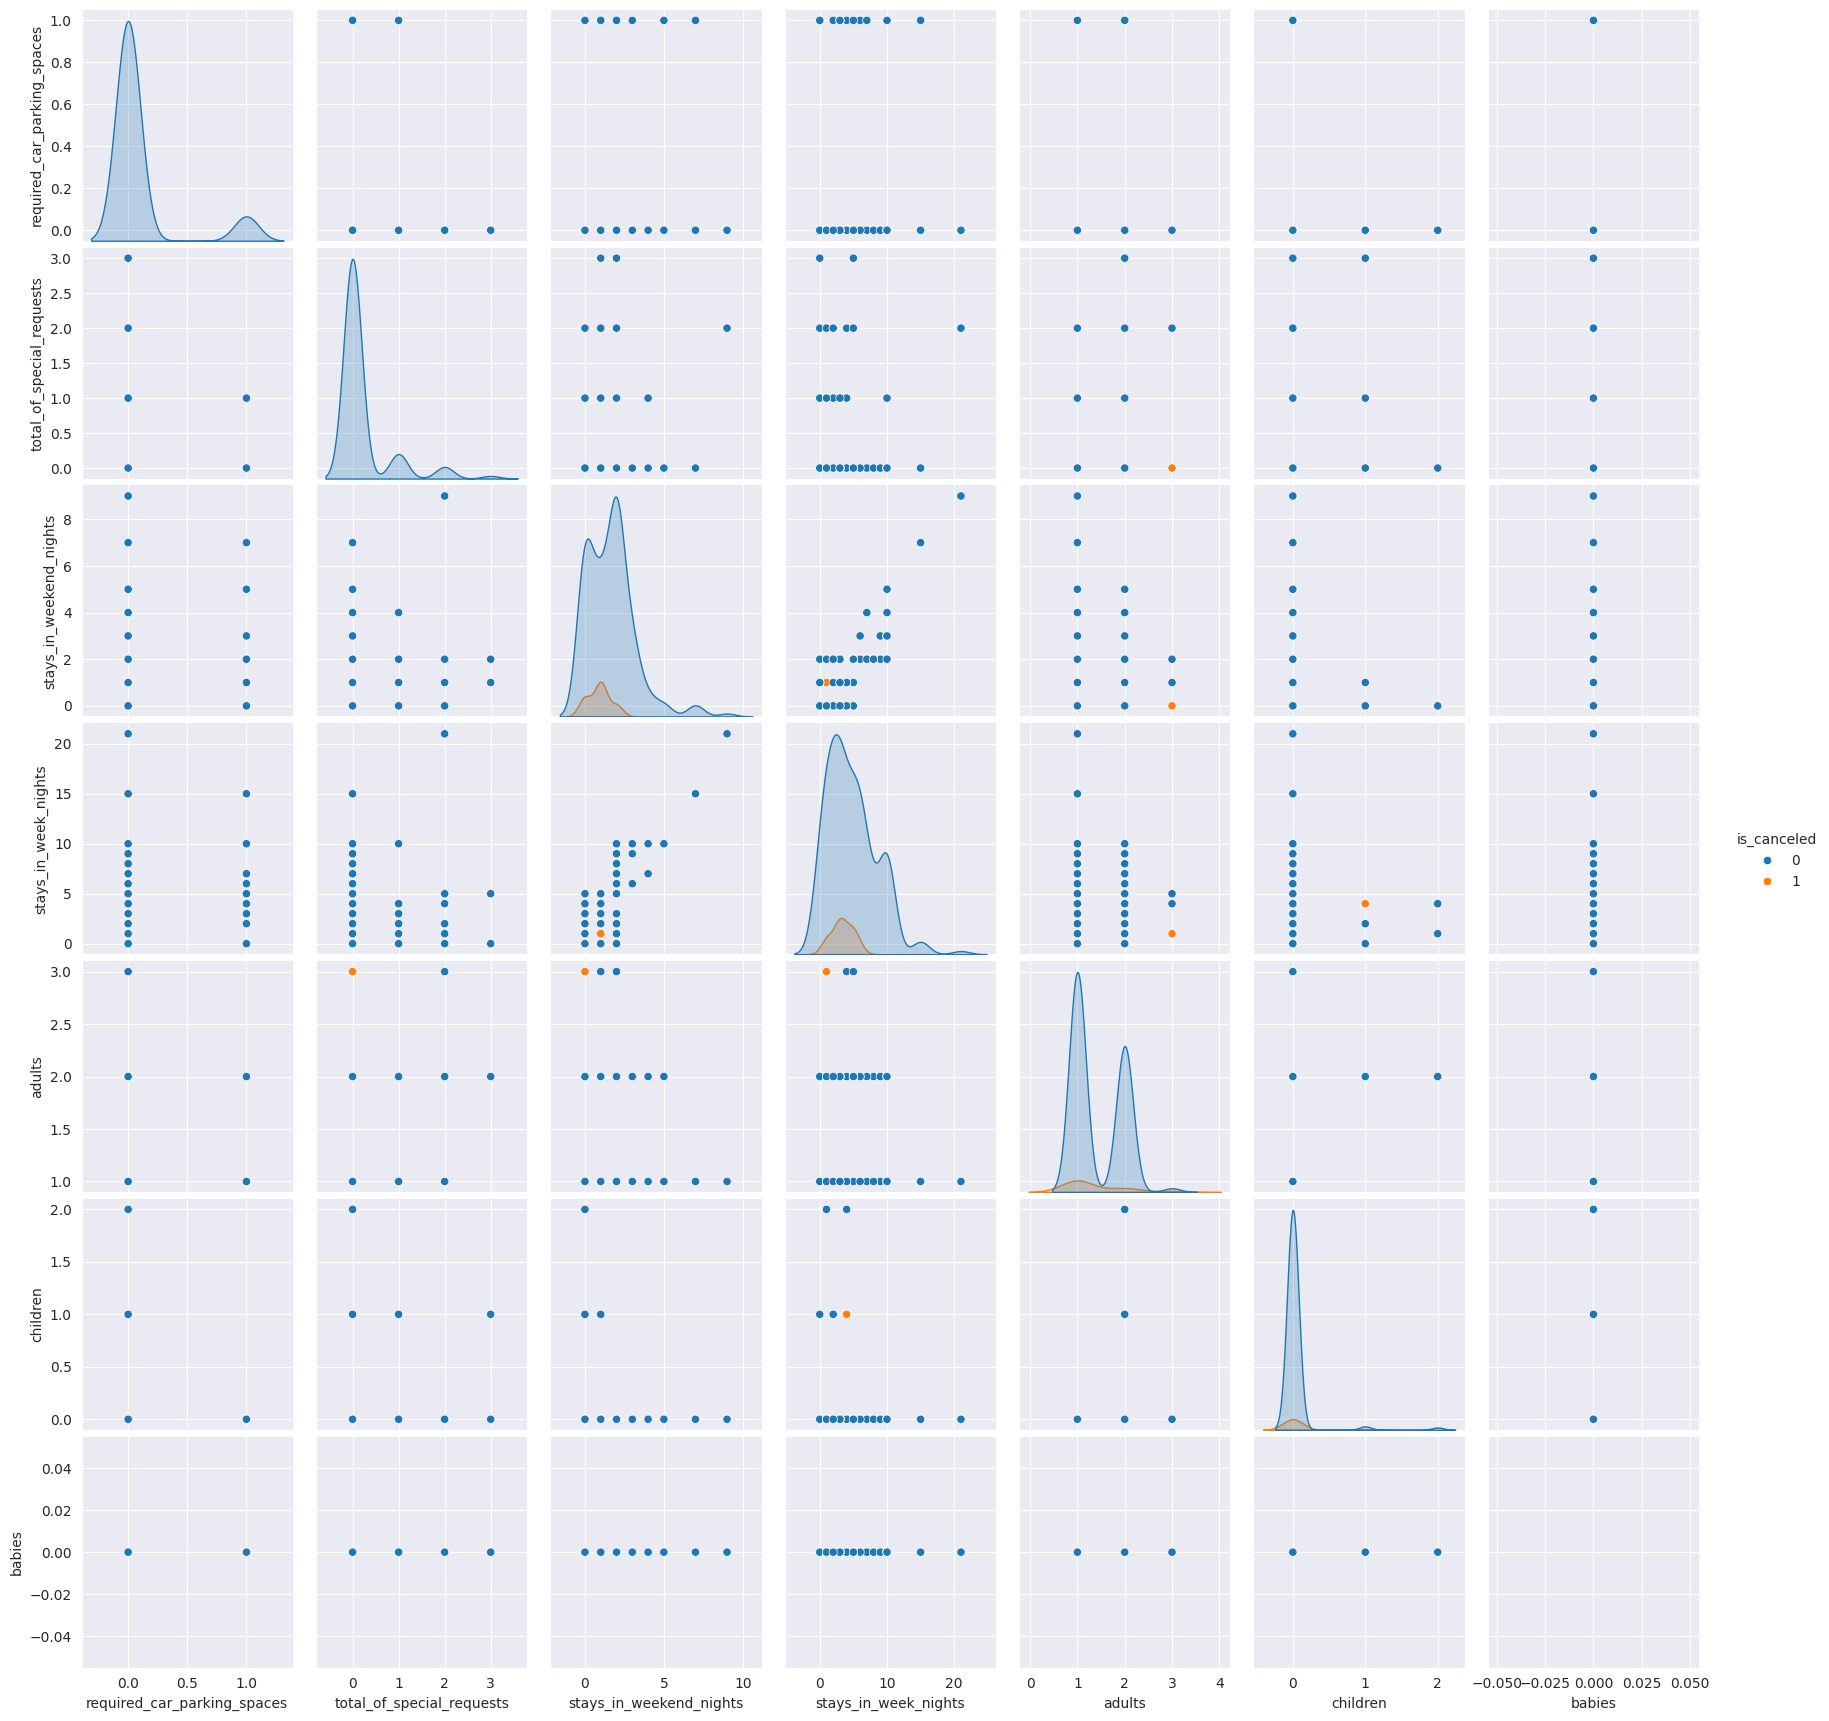

In [34]:
stay_details = ["hotel", "meal", "reserved_room_type", "assigned_room_type", "required_car_parking_spaces",
                "total_of_special_requests", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children",
                "babies"]
sns.pairplot(data=hotel_bookings_dataset[stay_details + ["is_canceled"]], hue="is_canceled")


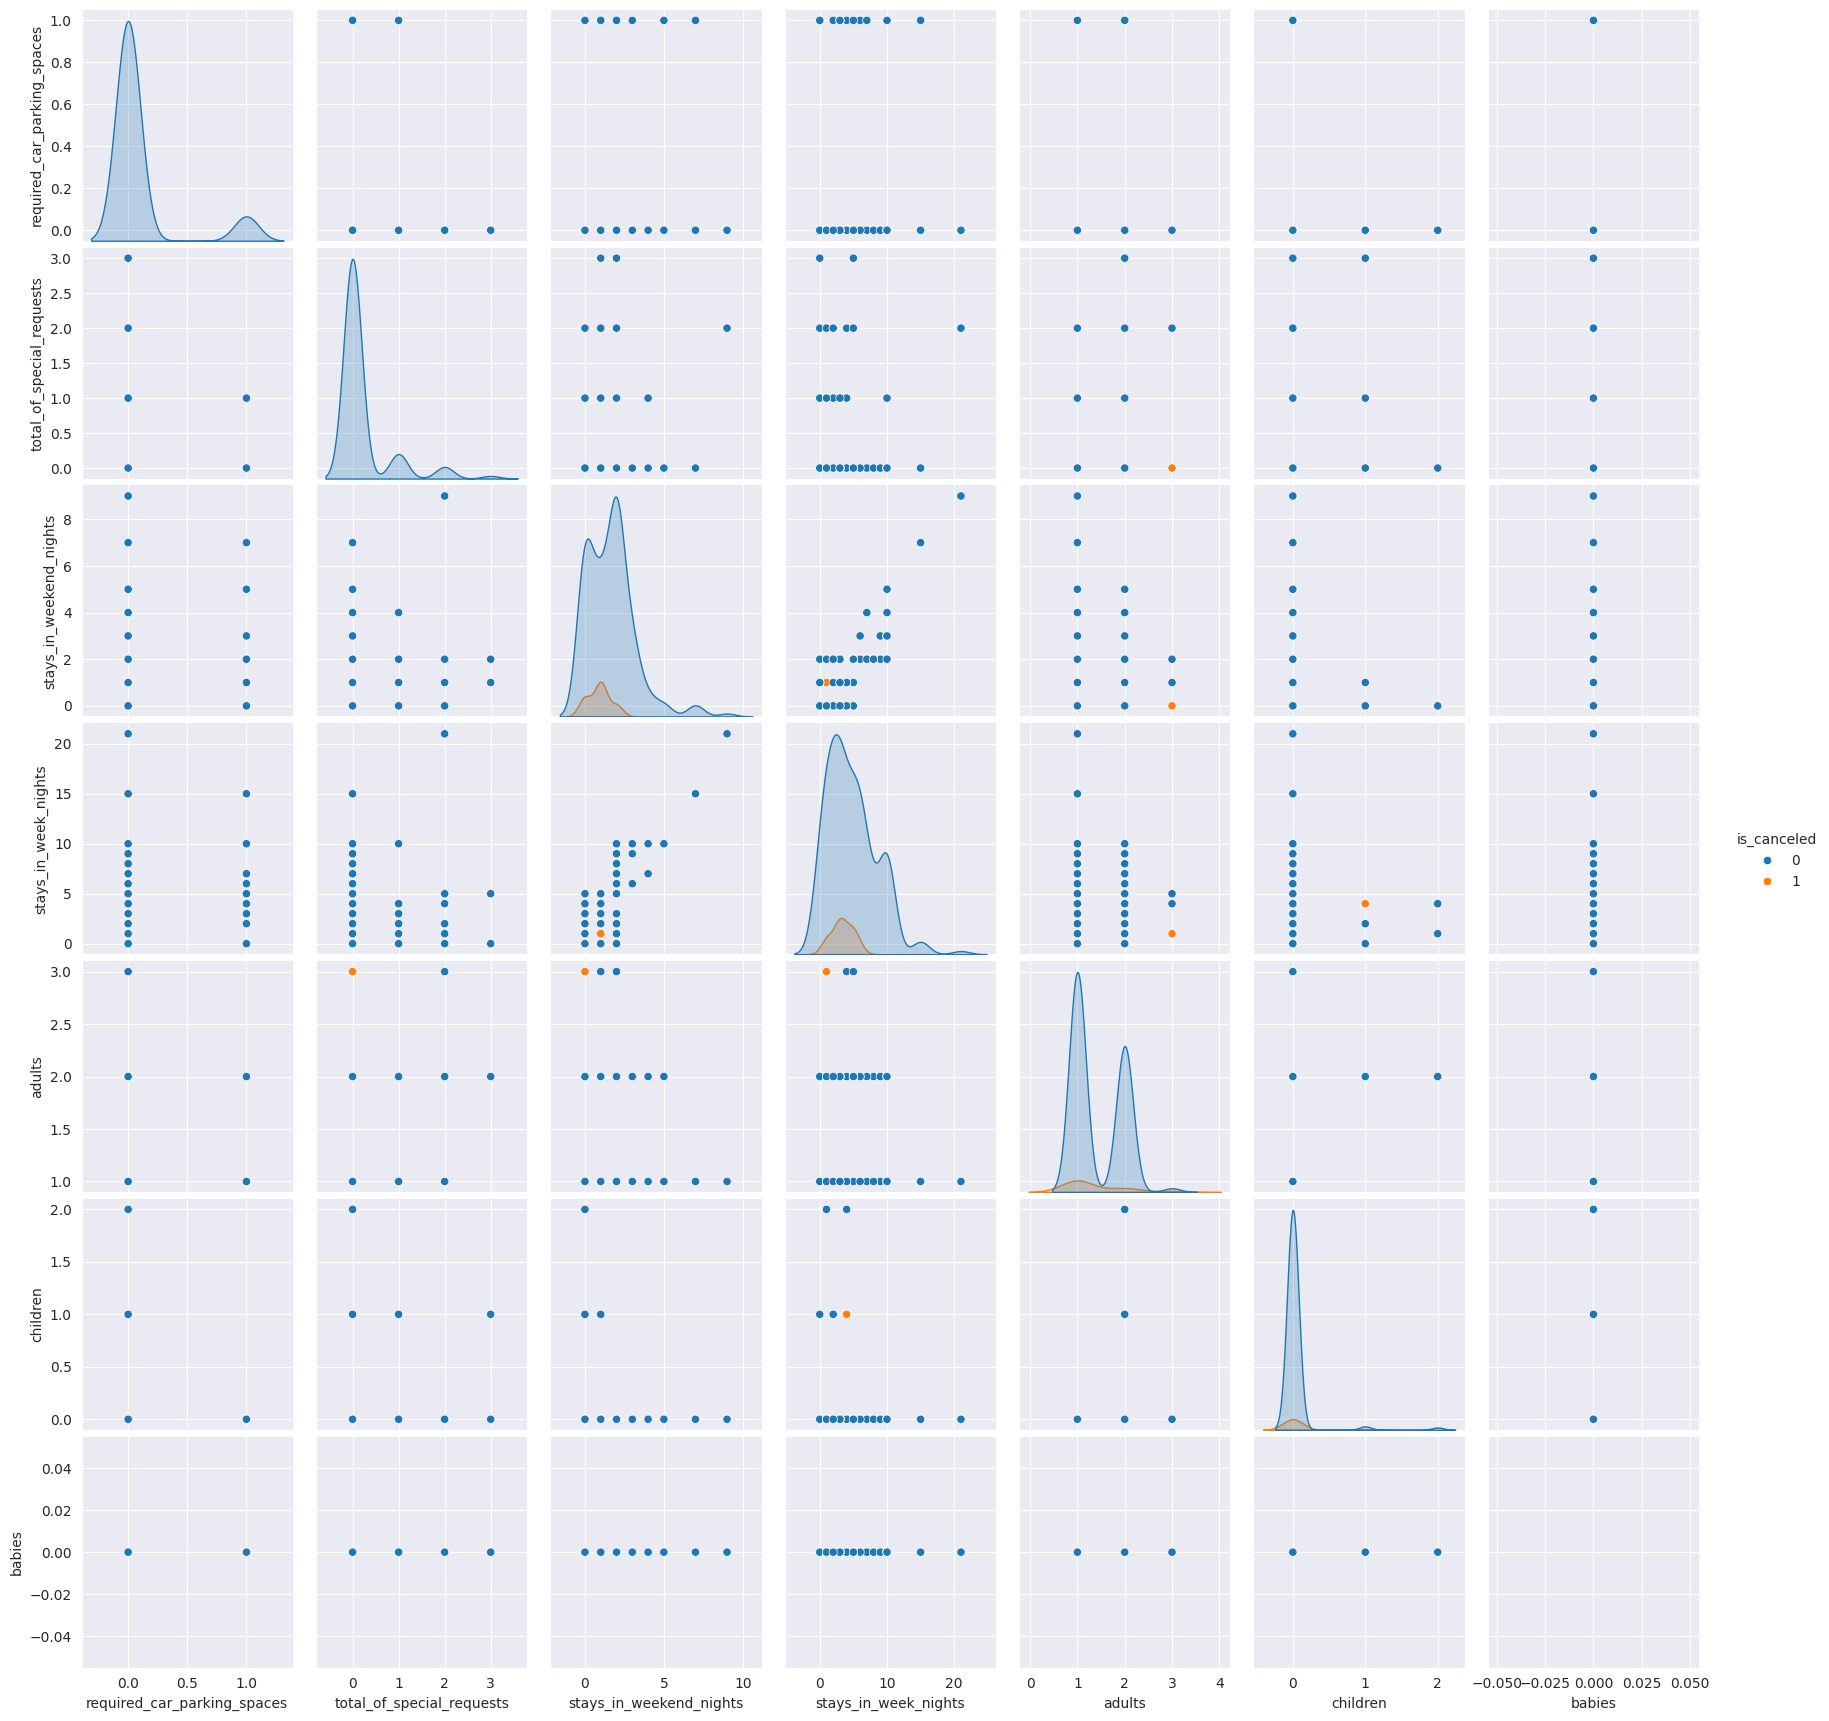

In [35]:
reservation_details = ["lead_time", "distribution_channel", "booking_changes", "deposit_type"]
sns.pairplot(data=hotel_bookings_dataset[stay_details + ["is_canceled"]], hue="is_canceled")


In [36]:
# TAKEN FROM END 3

In [37]:
# TAKEN FROM END 1

# Modeling and evaluation

In [38]:
# TAKEN FROM START 5
columns_to_be_transformed = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                             'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type',
                             'reservation_status', 'reservation_status_date']

le = preprocessing.LabelEncoder()

for column in columns_to_be_transformed:
    hotel_bookings_dataset[column] = le.fit_transform(hotel_bookings_dataset[column])

# TAKEN FROM END 5

# TAKEN FROM START 2
y = hotel_bookings_dataset['is_canceled']
X = hotel_bookings_dataset.drop('is_canceled', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# TAKEN FROM END 2

In [39]:
# TAKEN FROM START 4
lr_model = LogisticRegression(max_iter=max_iter_lr)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Area Under the Receiver Operating Characteristic Curve: ", roc_auc)
# TAKEN FROM END 4

Accuracy:  0.8863636363636364
Area Under the Receiver Operating Characteristic Curve:  0.6


/home/paula/Documents/GitHub/own-repositories/hotel-bookings-analyzer/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
